In [44]:
"""
Usage details:
Step 1: Get preprocessed data using get_data.sh script.
    a. Verify that all the files in a particular directory have valid content.
       If some file doesn't have complete data then the script will output empty data.
    b. Run the script like "get_data.sh file.txt num_cores is_shared". is_shared is 1 if
       the results are for shared llc, 0 otherwise. This has to be done for each file.
       for FILE in *; do get_data.sh file.txt num_cores is_shared; done
    c. The above step will generate file_preprocessed.txt in a folder named "preprocessed_results" 
    for different file_names. Move the results in the desired place.
Step 2:
    a. List the two data points to compare and corresponding directories.
    b. Get the processed_data for each file for each of the two data points.
       Signature : process_file(file, num_core)
       Data point structure:
       For each data point(e.g."shared", "sliced"):
       [ [(sim_inst_count, cpu_data)] for each file in a data point]
       cpu_data structure
       [(global_mpki, ipc, cache_data) for each cpu]
       cache_data structure:
       [[total_access, hit, miss, mpki] for each cache] : 4x4
    c. Use the processed data as needed.
"""

'\nUsage details:\nStep 1: Get preprocessed data using get_data.sh script.\n    a. Verify that all the files in a particular directory have valid content.\n       If some file doesn\'t have complete data then the script will output empty data.\n    b. Run the script like "get_data.sh file.txt num_cores is_shared". is_shared is 1 if\n       the results are for shared llc, 0 otherwise. This has to be done for each file.\n       for FILE in *; do get_data.sh file.txt num_cores is_shared; done\n    c. The above step will generate file_preprocessed.txt in a folder named "preprocessed_results" \n    for different file_names. Move the results in the desired place.\nStep 2:\n    a. List the two data points to compare and corresponding directories.\n    b. Get the processed_data for each file for each of the two data points.\n       Signature : process_file(file, num_core)\n       Data point structure:\n       For each data point(e.g."shared", "sliced"):\n       [ [(sim_inst_count, cpu_data)] f

In [45]:
def add(l1,l2):
    temp = []
    for i in range(0,len(l1)):
        temp.append(l1[i]+l2[i])
    return temp

In [46]:
def find_labels1(x):
    temp = []
    for i in range(len(x)):
        a = x[i].split('_')[0]
        temp.append(a.split('-')[0] + '(' +  a + ')')
        
    return temp

In [47]:
def find_labels2(x):
    
    temp = [] 
    for i in range(len(x)):
        a = x[i].split('_')[0]
        temp.append(a.split('-')[1] + '(' +  a + ')')
        
    return temp

In [48]:
import numpy as np

In [49]:
import matplotlib.pyplot as plt

In [50]:
import os

In [51]:
os.listdir()

['pref-of_shared',
 'pref-on_sliced',
 '__pycache__',
 'process_data2.py',
 'pref-of_sliced',
 '.ipynb_checkpoints',
 'plot_results.ipynb',
 'pref-on_shared',
 'process_data1.py']

In [52]:
from process_data1 import process_file1
from process_data2 import process_file2

In [53]:

pon_sliced_dir = "pref-on_sliced"

pof_sliced_dir = "pref-of_sliced"

pon_shared_dir = "pref-on_shared"
pof_shared_dir = "pref-of_shared"

"""
The processed files must be defined manually like :
shared_preprocessed_files = ["file1.txt", "file2.txt", ...].

The result will be in the same order as the files.
""" 

pon_sliced_preprocessed_files = os.listdir(pon_sliced_dir)


pof_sliced_preprocessed_files = os.listdir(pof_sliced_dir)

pon_shared_preprocessed_files = os.listdir(pon_shared_dir)


pof_shared_preprocessed_files = os.listdir(pof_shared_dir)



In [54]:
pon_sliced_preprocessed_files.sort()
pof_sliced_preprocessed_files.sort()
pon_shared_preprocessed_files.sort()
pof_shared_preprocessed_files.sort()

In [55]:
pon_sliced_preprocessed_files

['bwaves-omen_preprocessed.txt',
 'gcc_perl_preprocessed.txt',
 'mcf-cactu_preprocessed.txt']

In [56]:
pon_sliced_preprocessed_result = []
for file in pon_sliced_preprocessed_files:
    file_path = os.path.join(pon_sliced_dir, file)
    sim_inst_count, cpu_data = process_file1(file_path, 2)
    pon_sliced_preprocessed_result.append((sim_inst_count, cpu_data))

    
pof_sliced_preprocessed_result = []
for file in pof_sliced_preprocessed_files:
    file_path = os.path.join(pof_sliced_dir, file)
    sim_inst_count, cpu_data = process_file1(file_path, 2)
    pof_sliced_preprocessed_result.append((sim_inst_count, cpu_data))

    
pon_shared_preprocessed_result = []
for file in pon_shared_preprocessed_files:
    file_path = os.path.join(pon_shared_dir, file)
    sim_inst_count, cpu_data = process_file2(file_path, 2)
    pon_shared_preprocessed_result.append((sim_inst_count, cpu_data))

    
pof_shared_preprocessed_result = []
for file in pof_shared_preprocessed_files:
    file_path = os.path.join(pof_shared_dir, file)
    sim_inst_count, cpu_data = process_file2(file_path, 2)
    pof_shared_preprocessed_result.append((sim_inst_count, cpu_data))

38.5211
11.9298
12.5499
6.62145
0.00347583
4.04107
38.0318
11.9298
19.5696
6.28382
0.00347251
4.04107


In [57]:
pon_sliced = {'INST': 0}
pon_shared = {'INST' : 0}

pof_sliced = {'INST': 0}
pof_shared = {'INST' : 0}


In [58]:
sliced_fields = {'MPKI','L2_ACCESS', 'L2_MISS', 'L2_HIT', 'LLC0_ACCESS', 'LLC0_MISS','LLC0_HIT' , 'LLC1_ACCESS', 'LLC1_MISS','LLC1_HIT','LLC1_MPKI','LLC0_MPKI','L2_MPKI'  }
shared_fields = {'MPKI','L2_ACCESS', 'L2_MISS', 'L2_HIT', 'LLC_ACCESS', 'LLC_MISS','LLC_HIT','L2_MPKI', 'LLC_MPKI'  }

In [59]:
pon_sliced_preprocessed_result[0][0]

100000000

In [60]:
for i in sliced_fields:
    
    pon_sliced['C0_'+i] = 0
    pof_sliced['C1_'+i] = 0
    
for i in shared_fields:
    
    pon_shared['C0_'+i] = 0
    pof_shared['C1_'+i] = 0
    


In [61]:
def fun(dic, label):
    temp = []
    
    for i in range(len(dic)):
        temp.append(dic[i][label])
        
    return temp

In [62]:
len(pon_sliced_preprocessed_result)

3

In [63]:
pon_sliced_lis = []
pon_shared_lis = []
pof_sliced_lis = []
pof_shared_lis = []
for i in range(0,len(pon_sliced_preprocessed_result)):
    temp1 = pon_sliced.copy()
    temp2 = pon_shared.copy()
    pon_sliced_lis.append(temp1)
    pon_shared_lis.append(temp2)

for i in range(0,len(pof_sliced_preprocessed_result)):
    temp1 = pof_sliced.copy()
    temp2 = pof_shared.copy()
    pof_sliced_lis.append(temp1)
    pof_shared_lis.append(temp2)
    


In [64]:
pon_sliced_lis

[{'INST': 0,
  'C0_L2_MISS': 0,
  'C0_LLC0_MPKI': 0,
  'C0_LLC1_ACCESS': 0,
  'C0_MPKI': 0,
  'C0_LLC1_MISS': 0,
  'C0_LLC0_ACCESS': 0,
  'C0_L2_HIT': 0,
  'C0_LLC0_MISS': 0,
  'C0_LLC1_HIT': 0,
  'C0_LLC1_MPKI': 0,
  'C0_LLC0_HIT': 0,
  'C0_L2_MPKI': 0,
  'C0_L2_ACCESS': 0},
 {'INST': 0,
  'C0_L2_MISS': 0,
  'C0_LLC0_MPKI': 0,
  'C0_LLC1_ACCESS': 0,
  'C0_MPKI': 0,
  'C0_LLC1_MISS': 0,
  'C0_LLC0_ACCESS': 0,
  'C0_L2_HIT': 0,
  'C0_LLC0_MISS': 0,
  'C0_LLC1_HIT': 0,
  'C0_LLC1_MPKI': 0,
  'C0_LLC0_HIT': 0,
  'C0_L2_MPKI': 0,
  'C0_L2_ACCESS': 0},
 {'INST': 0,
  'C0_L2_MISS': 0,
  'C0_LLC0_MPKI': 0,
  'C0_LLC1_ACCESS': 0,
  'C0_MPKI': 0,
  'C0_LLC1_MISS': 0,
  'C0_LLC0_ACCESS': 0,
  'C0_L2_HIT': 0,
  'C0_LLC0_MISS': 0,
  'C0_LLC1_HIT': 0,
  'C0_LLC1_MPKI': 0,
  'C0_LLC0_HIT': 0,
  'C0_L2_MPKI': 0,
  'C0_L2_ACCESS': 0}]

In [65]:
for i in range(0,len(pon_sliced_lis)):
    pon_sliced_lis[i]['INST'] =  pon_sliced_preprocessed_result[i][0]
    pon_sliced_lis[i]['C0_L2_MISS'] = pon_sliced_preprocessed_result[i][1][0][2][2][2]
    pon_sliced_lis[i]['C1_L2_MISS']=  pon_sliced_preprocessed_result[i][1][1][2][2][2]
    pon_sliced_lis[i]['C0_L2_HIT'] =  pon_sliced_preprocessed_result[i][1][0][2][2][1]
    pon_sliced_lis[i]['C1_L2_HIT'] =  pon_sliced_preprocessed_result[i][1][1][2][2][1]
    pon_sliced_lis[i]['C0_LLC1_MISS']= pon_sliced_preprocessed_result[i][1][0][2][4][2]
    pon_sliced_lis[i]['C1_LLC1_MISS'] =  pon_sliced_preprocessed_result[i][1][1][2][4][2]
    pon_sliced_lis[i]['C0_LLC0_ACCESS'] = pon_sliced_preprocessed_result[i][1][0][2][3][0]
    pon_sliced_lis[i]['C1_LLC0_ACCESS'] =  pon_sliced_preprocessed_result[i][1][1][2][3][0]
    pon_sliced_lis[i]['C0_LLC1_HIT'] = pon_sliced_preprocessed_result[i][1][0][2][4][1]
    pon_sliced_lis[i]['C1_LLC1_HIT'] = pon_sliced_preprocessed_result[i][1][1][2][4][1]
    pon_sliced_lis[i]['C0_IPC']=  pon_sliced_preprocessed_result[i][1][0][1]
    pon_sliced_lis[i]['C1_IPC'] = pon_sliced_preprocessed_result[i][1][1][1]
    pon_sliced_lis[i]['C0_MPKI']=  pon_sliced_preprocessed_result[i][1][0][0]
    pon_sliced_lis[i]['C1_MPKI'] = pon_sliced_preprocessed_result[i][1][1][0]
    pon_sliced_lis[i]['C0_LLC0_MISS'] = pon_sliced_preprocessed_result[i][1][0][2][3][2]
    pon_sliced_lis[i]['C1_LLC0_MISS'] = pon_sliced_preprocessed_result[i][1][1][2][3][2]
    pon_sliced_lis[i]['C0_LLC1_ACCESS'] = pon_sliced_preprocessed_result[i][1][0][2][4][0]
    pon_sliced_lis[i]['C1_LLC1_ACCESS'] =  pon_sliced_preprocessed_result[i][1][1][2][4][0]
    pon_sliced_lis[i]['C0_L2_ACCESS'] =  pon_sliced_preprocessed_result[i][1][0][2][2][0]
    pon_sliced_lis[i]['C1_L2_ACCESS'] =  pon_sliced_preprocessed_result[i][1][1][2][2][0]
    pon_sliced_lis[i]['C0_LLC0_HIT']  = pon_sliced_preprocessed_result[i][1][0][2][3][1]
    pon_sliced_lis[i]['C1_LLC0_HIT']  = pon_sliced_preprocessed_result[i][1][1][2][3][1]
    pon_sliced_lis[i]['C0_LLC1_MPKI'] = pon_sliced_preprocessed_result[i][1][0][2][4][3]
    pon_sliced_lis[i]['C1_LLC1_MPKI'] = pon_sliced_preprocessed_result[i][1][1][2][4][3]
    pon_sliced_lis[i]['C0_L2_MPKI'] =  pon_sliced_preprocessed_result[i][1][0][2][2][3]
    pon_sliced_lis[i]['C1_L2_MPKI'] =  pon_sliced_preprocessed_result[i][1][1][2][2][3]
    
    
for i in range(0,len(pof_sliced_lis)):
    pof_sliced_lis[i]['INST'] =  pof_sliced_preprocessed_result[i][0]
    pof_sliced_lis[i]['C0_L2_MISS'] = pof_sliced_preprocessed_result[i][1][0][2][2][2]
    pof_sliced_lis[i]['C1_L2_MISS']=  pof_sliced_preprocessed_result[i][1][1][2][2][2]
    pof_sliced_lis[i]['C0_L2_HIT'] =  pof_sliced_preprocessed_result[i][1][0][2][2][1]
    pof_sliced_lis[i]['C1_L2_HIT'] =  pof_sliced_preprocessed_result[i][1][1][2][2][1]
    pof_sliced_lis[i]['C0_LLC1_MISS']= pof_sliced_preprocessed_result[i][1][0][2][4][2]
    pof_sliced_lis[i]['C1_LLC1_MISS'] =  pof_sliced_preprocessed_result[i][1][1][2][4][2]
    pof_sliced_lis[i]['C0_LLC0_ACCESS'] = pof_sliced_preprocessed_result[i][1][0][2][3][0]
    pof_sliced_lis[i]['C1_LLC0_ACCESS'] =  pof_sliced_preprocessed_result[i][1][1][2][3][0]
    pof_sliced_lis[i]['C0_LLC1_HIT'] = pof_sliced_preprocessed_result[i][1][0][2][4][1]
    pof_sliced_lis[i]['C1_LLC1_HIT'] = pof_sliced_preprocessed_result[i][1][1][2][4][1]
    pof_sliced_lis[i]['C0_IPC']=  pof_sliced_preprocessed_result[i][1][0][1]
    pof_sliced_lis[i]['C1_IPC'] = pof_sliced_preprocessed_result[i][1][1][1]
    pof_sliced_lis[i]['C0_MPKI']=  pof_sliced_preprocessed_result[i][1][0][0]
    pof_sliced_lis[i]['C1_MPKI'] = pof_sliced_preprocessed_result[i][1][1][0]
    pof_sliced_lis[i]['C0_LLC0_MISS'] = pof_sliced_preprocessed_result[i][1][0][2][3][2]
    pof_sliced_lis[i]['C1_LLC0_MISS'] = pof_sliced_preprocessed_result[i][1][1][2][3][2]
    pof_sliced_lis[i]['C0_LLC1_ACCESS'] = pof_sliced_preprocessed_result[i][1][0][2][4][0]
    pof_sliced_lis[i]['C1_LLC1_ACCESS'] =  pof_sliced_preprocessed_result[i][1][1][2][4][0]
    pof_sliced_lis[i]['C0_L2_ACCESS'] =  pof_sliced_preprocessed_result[i][1][0][2][2][0]
    pof_sliced_lis[i]['C1_L2_ACCESS'] =  pof_sliced_preprocessed_result[i][1][1][2][2][0]
    pof_sliced_lis[i]['C0_LLC0_HIT']  = pof_sliced_preprocessed_result[i][1][0][2][3][1]
    pof_sliced_lis[i]['C1_LLC0_HIT']  = pof_sliced_preprocessed_result[i][1][1][2][3][1]
    pof_sliced_lis[i]['C0_LLC1_MPKI'] = pof_sliced_preprocessed_result[i][1][0][2][4][3]
    pof_sliced_lis[i]['C1_LLC1_MPKI'] = pof_sliced_preprocessed_result[i][1][1][2][4][3]
    pof_sliced_lis[i]['C0_L2_MPKI'] =  pof_sliced_preprocessed_result[i][1][0][2][2][3]
    pof_sliced_lis[i]['C1_L2_MPKI'] =  pof_sliced_preprocessed_result[i][1][1][2][2][3]

In [66]:
for i in range(0,len(pon_shared_lis)):
    pon_shared_lis[i]['INST'] =  pon_shared_preprocessed_result[i][0]
    pon_shared_lis[i]['C0_L2_MISS'] = pon_shared_preprocessed_result[i][1][0][2][2][2]
    pon_shared_lis[i]['C1_L2_MISS']=  pon_shared_preprocessed_result[i][1][1][2][2][2]
    pon_shared_lis[i]['C0_L2_HIT'] =  pon_shared_preprocessed_result[i][1][0][2][2][1]
    pon_shared_lis[i]['C1_L2_HIT'] =  pon_shared_preprocessed_result[i][1][1][2][2][1]
    pon_shared_lis[i]['C0_LLC_MISS']= pon_shared_preprocessed_result[i][1][0][2][3][2]
    pon_shared_lis[i]['C1_LLC_MISS'] =  pon_shared_preprocessed_result[i][1][1][2][3][2]
    pon_shared_lis[i]['C0_LLC_HIT'] = pon_shared_preprocessed_result[i][1][0][2][3][1]
    pon_shared_lis[i]['C1_LLC_HIT'] = pon_shared_preprocessed_result[i][1][1][2][3][1]
    pon_shared_lis[i]['C0_IPC']=  pon_shared_preprocessed_result[i][1][0][1]
    pon_shared_lis[i]['C1_IPC'] = pon_shared_preprocessed_result[i][1][1][1]
    pon_shared_lis[i]['C0_MPKI']=  pon_shared_preprocessed_result[i][1][0][0]
    pon_shared_lis[i]['C1_MPKI'] = pon_shared_preprocessed_result[i][1][1][0]
    pon_shared_lis[i]['C0_LLC_ACCESS'] = pon_shared_preprocessed_result[i][1][0][2][3][0]
    pon_shared_lis[i]['C1_LLC_ACCESS'] =  pon_shared_preprocessed_result[i][1][1][2][3][0]
    pon_shared_lis[i]['C0_L2_ACCESS'] =  pon_shared_preprocessed_result[i][1][0][2][2][0]
    pon_shared_lis[i]['C1_L2_ACCESS'] =  pon_shared_preprocessed_result[i][1][1][2][2][0]
    pon_shared_lis[i]['C0_LLC_MPKI'] = pon_shared_preprocessed_result[i][1][0][2][3][3]
    pon_shared_lis[i]['C1_LLC_MPKI'] = pon_shared_preprocessed_result[i][1][1][2][3][3]
    pon_shared_lis[i]['C0_L2_MPKI'] =  pon_shared_preprocessed_result[i][1][0][2][2][3]
    pon_shared_lis[i]['C1_L2_MPKI'] =  pon_shared_preprocessed_result[i][1][1][2][2][3]
    
    
for i in range(0,len(pof_shared_lis)):
    pof_shared_lis[i]['INST'] =  pof_shared_preprocessed_result[i][0]
    pof_shared_lis[i]['C0_L2_MISS'] = pof_shared_preprocessed_result[i][1][0][2][2][2]
    pof_shared_lis[i]['C1_L2_MISS']=  pof_shared_preprocessed_result[i][1][1][2][2][2]
    pof_shared_lis[i]['C0_L2_HIT'] =  pof_shared_preprocessed_result[i][1][0][2][2][1]
    pof_shared_lis[i]['C1_L2_HIT'] =  pof_shared_preprocessed_result[i][1][1][2][2][1]
    pof_shared_lis[i]['C0_LLC_MISS']= pof_shared_preprocessed_result[i][1][0][2][3][2]
    pof_shared_lis[i]['C1_LLC_MISS'] =  pof_shared_preprocessed_result[i][1][1][2][3][2]
    pof_shared_lis[i]['C0_LLC_HIT'] = pof_shared_preprocessed_result[i][1][0][2][3][1]
    pof_shared_lis[i]['C1_LLC_HIT'] = pof_shared_preprocessed_result[i][1][1][2][3][1]
    pof_shared_lis[i]['C0_IPC']=  pof_shared_preprocessed_result[i][1][0][1]
    pof_shared_lis[i]['C1_IPC'] = pof_shared_preprocessed_result[i][1][1][1]
    pof_shared_lis[i]['C0_MPKI']=  pof_shared_preprocessed_result[i][1][0][0]
    pof_shared_lis[i]['C1_MPKI'] = pof_shared_preprocessed_result[i][1][1][0]
    pof_shared_lis[i]['C0_LLC_ACCESS'] = pof_shared_preprocessed_result[i][1][0][2][3][0]
    pof_shared_lis[i]['C1_LLC_ACCESS'] =  pof_shared_preprocessed_result[i][1][1][2][3][0]
    pof_shared_lis[i]['C0_L2_ACCESS'] =  pof_shared_preprocessed_result[i][1][0][2][2][0]
    pof_shared_lis[i]['C1_L2_ACCESS'] =  pof_shared_preprocessed_result[i][1][1][2][2][0]
    pof_shared_lis[i]['C0_LLC_MPKI'] = pof_shared_preprocessed_result[i][1][0][2][3][3]
    pof_shared_lis[i]['C1_LLC_MPKI'] = pof_shared_preprocessed_result[i][1][1][2][3][3]
    pof_shared_lis[i]['C0_L2_MPKI'] =  pof_shared_preprocessed_result[i][1][0][2][2][3]
    pof_shared_lis[i]['C1_L2_MPKI'] =  pof_shared_preprocessed_result[i][1][1][2][2][3]

In [67]:
pof_sliced_lis

[{'INST': 100000000,
  'C1_L2_MISS': 1371803,
  'C1_LLC0_MPKI': 0,
  'C1_LLC1_ACCESS': 1018291,
  'C1_MPKI': 11.9298,
  'C1_LLC1_MISS': 845588,
  'C1_LLC0_ACCESS': 1022619,
  'C1_L2_HIT': 1461792,
  'C1_LLC0_MISS': 846649,
  'C1_LLC1_HIT': 172703,
  'C1_LLC1_MPKI': 8.45588,
  'C1_LLC0_HIT': 175970,
  'C1_L2_MPKI': 13.71803,
  'C1_L2_ACCESS': 2833595,
  'C0_L2_MISS': 2709226,
  'C0_L2_HIT': 0,
  'C0_LLC1_MISS': 1354374,
  'C0_LLC0_ACCESS': 1354459,
  'C0_LLC1_HIT': 393,
  'C0_IPC': 0.591264,
  'C1_IPC': 0.23909,
  'C0_MPKI': 38.0318,
  'C0_LLC0_MISS': 1354323,
  'C0_LLC1_ACCESS': 1354767,
  'C0_L2_ACCESS': 2709226,
  'C0_LLC0_HIT': 136,
  'C0_LLC1_MPKI': 13.54374,
  'C0_L2_MPKI': 27.09226},
 {'INST': 100000000,
  'C1_L2_MISS': 74740,
  'C1_LLC0_MPKI': 0,
  'C1_LLC1_ACCESS': 43979,
  'C1_MPKI': 6.28382,
  'C1_LLC1_MISS': 39133,
  'C1_LLC0_ACCESS': 43889,
  'C1_L2_HIT': 266480,
  'C1_LLC0_MISS': 39078,
  'C1_LLC1_HIT': 4846,
  'C1_LLC1_MPKI': 0.39133,
  'C1_LLC0_HIT': 4811,
  'C1_L2_MPKI'

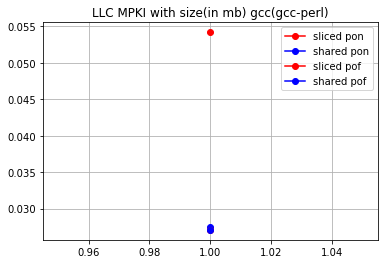

In [39]:
x=[1]
plt.title('LLC MPKI with size(in mb) gcc(gcc-perl)')

res = [i / j for i, j in zip(add(fun(pon_sliced_lis,'C0_LLC1_MISS') ,fun(pon_sliced_lis,'C0_LLC1_MISS') ), fun(pon_sliced_lis,'INST'))]

plt.plot(x,res, 'r' ,marker='o',label="sliced pon")

res = [i / j for i, j in zip(fun(pon_shared_lis,'C0_LLC_MISS'), fun(pon_shared_lis,'INST'))]
plt.plot(x,res, 'b' ,marker='o',label='shared pon')

res = [i / j for i, j in zip(add(fun(pof_sliced_lis,'C0_LLC1_MISS') ,fun(pof_sliced_lis,'C0_LLC1_MISS') ), fun(pof_sliced_lis,'INST'))]

plt.plot(x,res, 'r' ,marker='o',label="sliced pof")

res = [i / j for i, j in zip(fun(pof_shared_lis,'C0_LLC_MISS'), fun(pof_shared_lis,'INST'))]
plt.plot(x,res, 'b' ,marker='o',label='shared pof')
plt.grid()
plt.legend(loc='best')
plt.show()

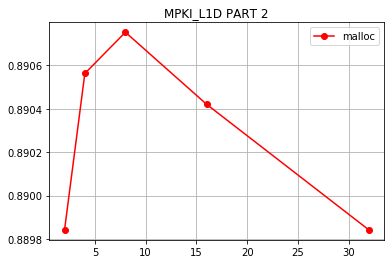

In [28]:
x=[2,4,8,16,32]
plt.title('MPKI_L1D PART 2')
plt.plot(x,fun(mc_sliced_lis,'C1_IPC'), 'r' ,marker='o',label="malloc")
#plt.plot(x,fun(bo_shared_lis,'C0_IPC'), 'b' ,marker='o',label='mmap')
plt.grid()
plt.legend(loc='best')
plt.show()

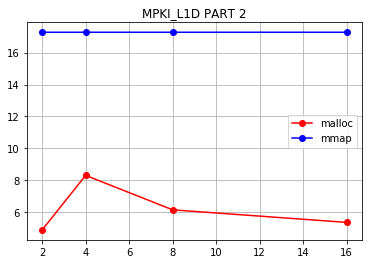

In [52]:
x=[2,4,8,16]
plt.title('MPKI_L1D PART 2')
plt.plot(x,fun(bo_sliced_lis,'C0_LLC1_MPKI'), 'r' ,marker='o',label="malloc")
plt.plot(x,fun(bo_shared_lis,'C0_LLC_MPKI'), 'b' ,marker='o',label='mmap')
plt.grid()
plt.legend(loc='best')
plt.show()

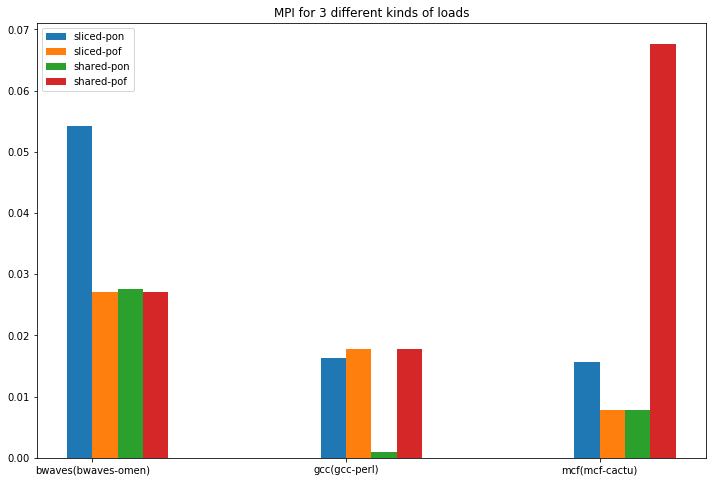

In [81]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(3)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.1
plt.title("MPI for 3 different kinds of loads")
res = [i / j for i, j in zip(add(fun(pon_sliced_lis,'C0_LLC0_MISS') ,fun(pon_sliced_lis,'C0_LLC1_MISS') ), fun(pon_sliced_lis,'INST'))]
# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, res, width=bar_width,label='sliced-pon' )
# Same thing, but offset the x by the width of the bar.

res = [i / j for i, j in zip(add(fun(pof_sliced_lis,'C0_LLC0_MISS') ,fun(pof_sliced_lis,'C0_LLC1_MISS') ), fun(pof_sliced_lis,'INST'))]
b2 = ax.bar(x + bar_width, res, width=bar_width, label='sliced-pof')

res = [i / j for i, j in zip(fun(pon_shared_lis,'C0_LLC_MISS'), fun(pon_shared_lis,'INST'))]
b3 = ax.bar(x + 2*bar_width, res, width=bar_width, label='shared-pon')




res = [i / j for i, j in zip(fun(pof_shared_lis,'C0_LLC_MISS'), fun(pof_shared_lis,'INST'))]
b4 = ax.bar(x + 3*bar_width, res, width=bar_width, label='shared-pof')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["bwaves(bwaves-omen)" , "gcc(gcc-perl)" , "mcf(mcf-cactu)"])
# Add legend.
ax.legend()

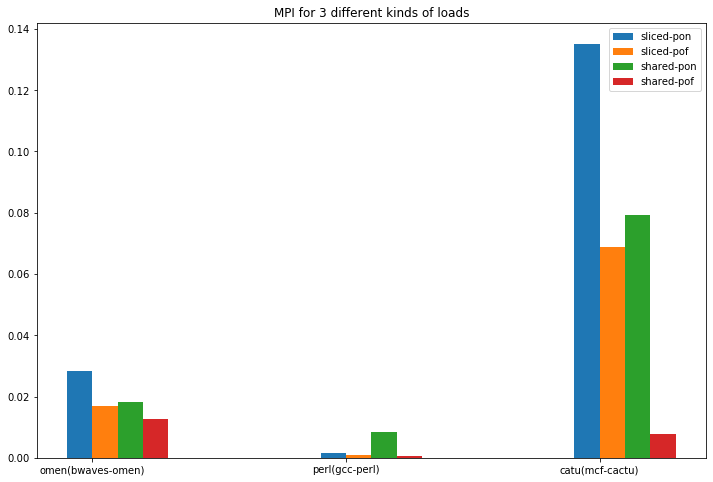

In [82]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(3)


plt.title("MPI for 3 different kinds of loads")
# Define bar width. We'll use this to offset the second bar.
bar_width = 0.1
res = [i / j for i, j in zip(add(fun(pon_sliced_lis,'C1_LLC1_MISS') ,fun(pon_sliced_lis,'C1_LLC0_MISS') ), fun(pon_sliced_lis,'INST'))]
# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, res, width=bar_width,label='sliced-pon' )
# Same thing, but offset the x by the width of the bar.

res = [i / j for i, j in zip(add(fun(pof_sliced_lis,'C1_LLC1_MISS') ,fun(pof_sliced_lis,'C1_LLC0_MISS') ), fun(pof_sliced_lis,'INST'))]
b2 = ax.bar(x + bar_width, res, width=bar_width, label='sliced-pof')

res = [i / j for i, j in zip(fun(pon_shared_lis,'C1_LLC_MISS'), fun(pon_shared_lis,'INST'))]
b3 = ax.bar(x + 2*bar_width, res, width=bar_width, label='shared-pon')




res = [i / j for i, j in zip(fun(pof_shared_lis,'C1_LLC_MISS'), fun(pof_shared_lis,'INST'))]
b4 = ax.bar(x + 3*bar_width, res, width=bar_width, label='shared-pof')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["omen(bwaves-omen)" , "perl(gcc-perl)" , "catu(mcf-cactu)"])
# Add legend.
ax.legend()

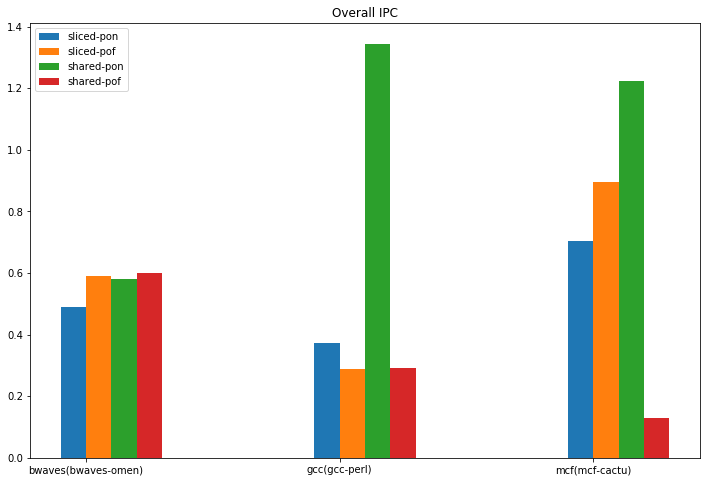

In [79]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(3)
plt.title("Overall IPC")
# Define bar width. We'll use this to offset the second bar.
bar_width = 0.1

# Note we add the `width` parameter now which sets the width of each bar.
res = fun(pon_sliced_lis,'C0_IPC')
res[1] -=0.2
b1 = ax.bar(x,res , width=bar_width,label='sliced-pon' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(pof_sliced_lis,'C0_IPC'), width=bar_width, label='sliced-pof')
b3 = ax.bar(x + 2*bar_width, fun(pon_shared_lis,'C0_IPC'), width=bar_width, label='shared-pon')

b4 = ax.bar(x + 3*bar_width, fun(pof_shared_lis,'C0_IPC'), width=bar_width, label='shared-pof')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["bwaves(bwaves-omen)" , "gcc(gcc-perl)" , "mcf(mcf-cactu)"])
# Add legend.
ax.legend()

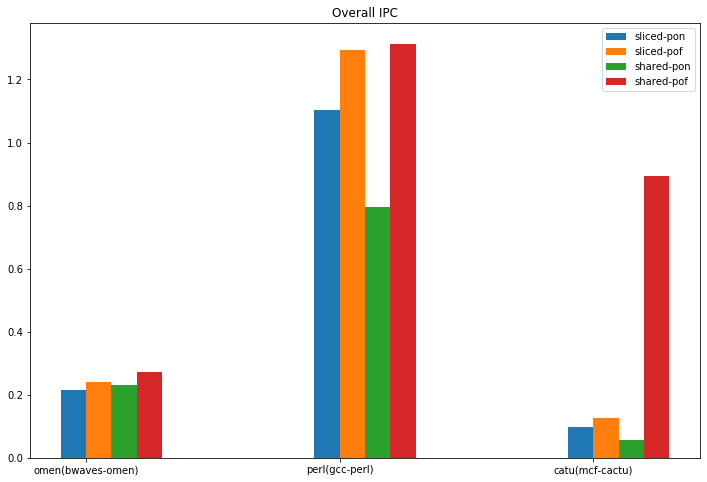

In [80]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(3)

plt.title("Overall IPC")
# Define bar width. We'll use this to offset the second bar.
bar_width = 0.1

# Note we add the `width` parameter now which sets the width of each bar.
res = fun(pon_sliced_lis,'C1_IPC')
res[1] -=0.2
b1 = ax.bar(x,res , width=bar_width,label='sliced-pon' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(pof_sliced_lis,'C1_IPC'), width=bar_width, label='sliced-pof')
b3 = ax.bar(x + 2*bar_width, fun(pon_shared_lis,'C1_IPC'), width=bar_width, label='shared-pon')

b4 = ax.bar(x + 3*bar_width, fun(pof_shared_lis,'C1_IPC'), width=bar_width, label='shared-pof')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["omen(bwaves-omen)" , "perl(gcc-perl)" , "catu(mcf-cactu)"])
# Add legend.
ax.legend()

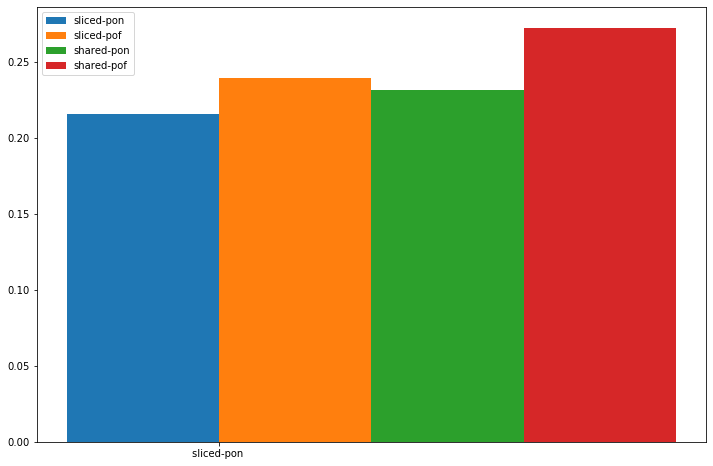

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(1)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.1

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, fun(pon_sliced_lis,'C1_IPC'), width=bar_width,label='sliced-pon' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(pof_sliced_lis,'C1_IPC'), width=bar_width, label='sliced-pof')
b3 = ax.bar(x + 2*bar_width, fun(pon_shared_lis,'C1_IPC'), width=bar_width, label='shared-pon')

b4 = ax.bar(x + 3*bar_width, fun(pof_shared_lis,'C1_IPC'), width=bar_width, label='shared-pof')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["sliced-pon ", "sliced-pof", "shared-pon", "shared-pof"])
# Add legend.
ax.legend()

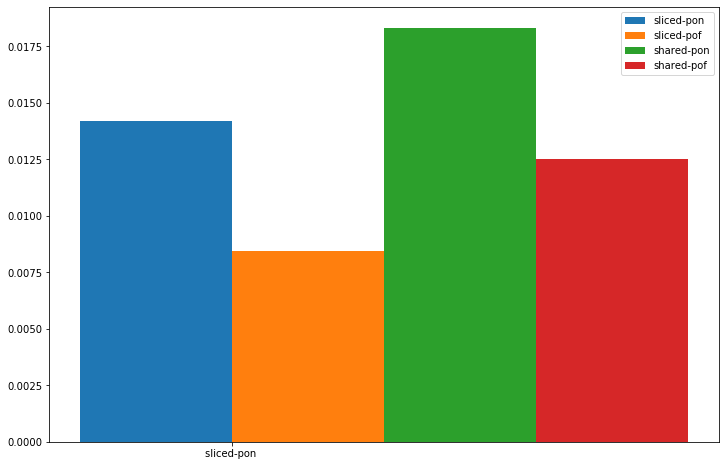

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(1)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.1

# Note we add the `width` parameter now which sets the width of each bar.
res = [i / j for i, j in zip(fun(pon_sliced_lis,'C1_LLC1_MISS'), fun(pon_sliced_lis,'INST'))]
b1 = ax.bar(x, res, width=bar_width,label='sliced-pon' )
# Same thing, but offset the x by the width of the bar.

res = [i / j for i, j in zip(fun(pof_sliced_lis,'C1_LLC1_MISS'), fun(pof_sliced_lis,'INST'))]
b2 = ax.bar(x + bar_width, res, width=bar_width, label='sliced-pof')

res = [i / j for i, j in zip(fun(pon_shared_lis,'C1_LLC_MISS'), fun(pon_shared_lis,'INST'))]
b3 = ax.bar(x + 2*bar_width, res, width=bar_width, label='shared-pon')

res = [i / j for i, j in zip(fun(pof_shared_lis,'C1_LLC_MISS'), fun(pof_shared_lis,'INST'))]
b4 = ax.bar(x + 3*bar_width, res, width=bar_width, label='shared-pof')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["sliced-pon ", "sliced-pof", "shared-pon", "shared-pof"])
# Add legend.
ax.legend()

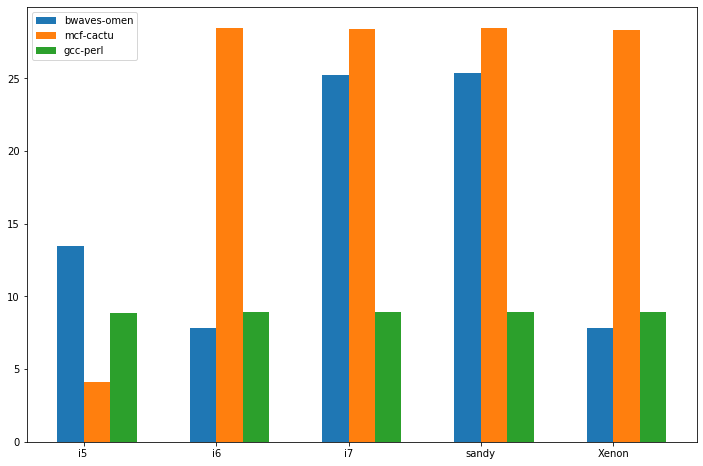

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.2

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, fun(bo_sliced_lis,'C0_LLC1_MPKI'), width=bar_width,label='bwaves-omen' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(mc_sliced_lis,'C0_LLC1_MPKI'), width=bar_width, label='mcf-cactu')
b3 = ax.bar(x + 2*bar_width, fun(gp_sliced_lis,'C0_LLC1_MPKI'), width=bar_width, label='gcc-perl')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()

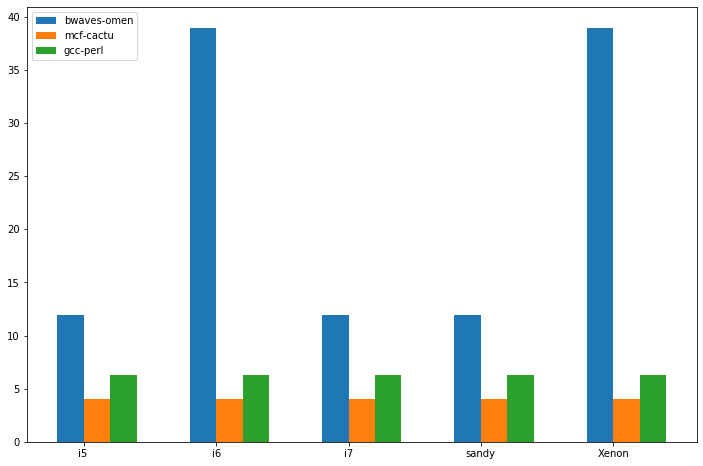

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.2

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, fun(bo_sliced_lis,'C0_MPKI'), width=bar_width,label='bwaves-omen' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(mc_sliced_lis,'C0_MPKI'), width=bar_width, label='mcf-cactu')
b3 = ax.bar(x + 2*bar_width, fun(gp_sliced_lis,'C0_MPKI'), width=bar_width, label='gcc-perl')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()

NameError: name 'sliced_lis' is not defined

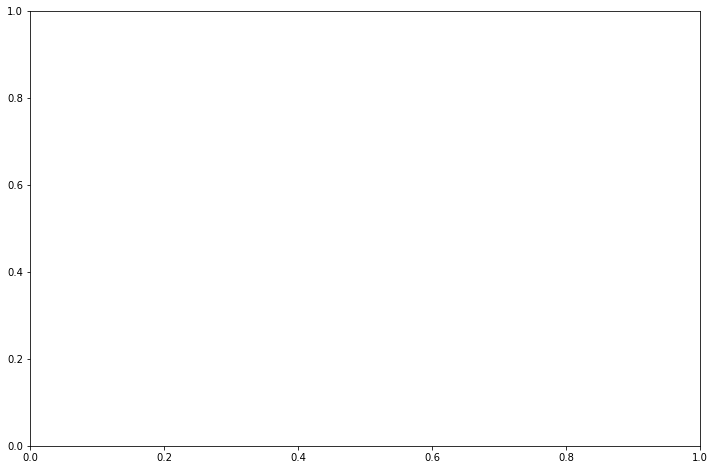

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, fun(sliced_lis,'C0_LLC1_MPKI'), width=bar_width,label='shared' )
# Same thing, but offset the x by the width of the bar.
#b2 = ax.bar(x + bar_width, fun(shared_lis,'C0_LLC_MPKI'), width=bar_width, label='sliced')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)

ax.set_xticklabels(find_labels1(shared_preprocessed_files))
# Add legend.
ax.legend()

In [115]:
shared_lis[0]['C0_L2_MPKI']

17.2788

In [148]:
x ="sas_ewd".split("_")[0]

In [149]:
x

'sas'